##### Ana Cristina Zanetti
##### Mauro Roberto Domingues Junior


---



## Descrição do problema e explanção dos dados

##### Construir um modelo de aprendizado supervisionado que possa classificar a pontuação de crédito de um cliente em poor, standard ou good.

##### Para construir este modelo, será utilizado um histórico de clientes disponibilizado em arquivo que contém:

1. ID -> Representa a identificação única para um registro de entrada
1. Customer_ID -> Representa a identificação única de um cliente
1. Month -> Representa o mês de criação do registro
1. Name -> Representa o nome do cliente
1. Age -> Representa a idade do cliente
1. SSN - Seguro social -> Representa o número de seguro social do cliente
1. Occupation -> Representa a ocupação/profissão do cliente
1. Annual_Income0- Renda Anual -> Representa a renda anual do cliente
1. Monthly_Inhand_Salary -> Representa o salário base mensal do cliente
1. Num_Bank_Accounts -> Representa o número de contas bancárias que o cliente possui
1. Num_Credit_Card -> Representa o número de cartões de crédito detidos pelo cliente
1. Interest_Rate -> Representa a taxa de juros
1. Num_of_Loan -> Representa o número de empréstimos contraídos no banco
1. Type_of_Loan -> Representa os tipos de empréstimo tomados pelo cliente
1. Delay_from_due_date -> Representa o número médio de dias de atraso desde a data de pagamento
1. Num_of_Delayed_Payment -> Representa o número médio de pagamentos atrasados ​​pelo cliente
1. Changed_Credit_Limit -> Representa a variação percentual no limite de crédito
1. Num_Credit_Inquiries -> Representa o número de consultas ao crédito
1. Credit_Mix -> Representa a classificação do mix de créditos
1. Outstanding_Debt -> Representa o total da dívida atual a ser paga (em USD)
1. Credit_Utilization_Ratio -> Representa a taxa de utilização de crédito
1. Credit_History_Age -> Representa a idade do histórico de crédito do cliente
1. Payment_of_Min_Amount -> Representa se apenas o valor mínimo foi pago pelo cliente
1. Total_EMI_per_month -> Representa os pagamentos mensais do EMI (parcelas do empréstimo em USD)
1. Amount_invested_monthly -> Representa o valor mensal investido pelo cliente (em USD)
1. Payment_Behaviour -> Representa o comportamento de pagamento do cliente (em USD)
1. Monthly_Balance -> Representa o valor do saldo mensal do cliente (em USD)
1. Credit_Score -> Representa a faixa de pontuação de crédito (ruim, padrão, bom)



## Análise de Dados Exploratória (*EDA*)

##### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


##### Carregando o conjunto de dados

In [137]:
df_credito = pd.read_csv('supervisionado/dataset/train.csv')
df_credito.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6972\3158571181.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credito = pd.read_csv('supervisionado/dataset/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94,NaN,No,49.57,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


*Observado já na carga,que a coluna Monthly_Balance, precisa ser trabalhada, tem vários tipos de dados, porém deveria ser numérica*

##### Informações sobre o dataset

In [87]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

*Muitos campos numéricos estão com object*

##### Todas as colunas relacionadas a identificação únicas de registros ou de cliente serão excluídas por não contribuírem para o Credit Score

In [138]:
colunas_excluir = ['ID', 'Customer_ID', 'Name','SSN']
df_credito = df_credito.drop(colunas_excluir, axis=1)

##### Quantidade de valores únicos por coluna e os valores

In [89]:
for column in df_credito.columns:
    unique_counts = df_credito[column].nunique()
    print(f"'{column}' tem {unique_counts} valores únicos")
    unique_values = df_credito[column].unique()
    if unique_counts > 30:
        print(unique_values[:30])
        print(f"({unique_counts - 30} valores adicionais não exibidos)")
    else:
        print(unique_values)
    print() 

'Month' tem 8 valores únicos
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

'Age' tem 1788 valores únicos
['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '7580' '30'
 '30_' '24' '24_' '44' '45' '40' '41' '32' '33_' '35' '35_' '36' '39' '37'
 '181' '20' '46']
(1758 valores adicionais não exibidos)

'Occupation' tem 16 valores únicos
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

'Annual_Income' tem 18940 valores únicos
['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '35547.71_' '35547.71' '73928.46' '131313.4' '10909427.0' '34081.38_'
 '34081.38' '114838.41' '114838.41_' '31370.8' '33751.27' '88640.24'
 '88640.24_' '54392.16' '54392.16_' '8701.545' '8701.545_' '25546.26'
 '25546.26_' '31993.78' '92047.08' '92047.08_' '32284.62' '97791.42']
(18910 valores adicionais não exibidos)

'Monthly_Inh

Observado:
* caracteres não numéricos em colunas numéricas -> Exxluir e transformar em numero
* colunas numéricas com muitos tipos únicos por terem muitas casas decimais ->Arredondar
* coluna mês somente com 8 meses -> Excluir coluna
* colunas categórcias com caracteres estranhos

##### Funções para Limpeza dos dados

In [90]:
# Remover caracteres não numericos
def remover_nao_numericos(coluna):
      return coluna.apply(lambda valor: re.sub(r'[^-\d.]', '', str(valor)))

# Transformar em número
def transformar_em_numero(coluna):
      return pd.to_numeric(coluna, errors='coerce')

# Limpar valores negativos
def limpar_valores_negativos(coluna):
      return coluna.apply(lambda valor: None if valor < 0 else valor)

# Delimitar valores das colunas
def delimitar_valores(coluna, limite_inferior, limite_superior):
        return coluna.apply(lambda valor: valor if limite_inferior <= valor <= limite_superior else np.nan)  


##### Excluir coluna Month

In [139]:
df_credito = df_credito.drop('Month', axis=1)

##### Converter os dados

In [140]:
colunas_converter_numericas = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [141]:
colunas_converter_cat = ['Occupation',  'Type_of_Loan', 'Credit_Mix','Payment_of_Min_Amount','Credit_Score','Payment_Behaviour']
df_credito[colunas_converter_cat] = df_credito[colunas_converter_cat].astype('category')

In [142]:
for coluna in colunas_converter_numericas:
    df_credito[coluna] = remover_nao_numericos(df_credito[coluna])
    df_credito[coluna] = transformar_em_numero(df_credito[coluna])

In [143]:
colunas_float = df_credito.select_dtypes(include='float64').columns
df_credito[colunas_float] = df_credito[colunas_float].round(2)

In [156]:
df_credito['Occupation'] = df_credito['Occupation'].replace('_______', None)
df_credito['Credit_Mix'] = df_credito['Credit_Mix'].replace('_', None)
df_credito['Payment_Behaviour'] = df_credito['Payment_Behaviour'].replace('!@9#%8', None)

In [144]:
for column in df_credito.columns:
    unique_counts = df_credito[column].nunique()
    print(f"'{column}' tem {unique_counts} valores únicos")  

'Age' tem 1728 valores únicos
'Occupation' tem 16 valores únicos
'Annual_Income' tem 13485 valores únicos
'Monthly_Inhand_Salary' tem 13124 valores únicos
'Num_Bank_Accounts' tem 943 valores únicos
'Num_Credit_Card' tem 1179 valores únicos
'Interest_Rate' tem 1750 valores únicos
'Num_of_Loan' tem 414 valores únicos
'Type_of_Loan' tem 6260 valores únicos
'Delay_from_due_date' tem 73 valores únicos
'Num_of_Delayed_Payment' tem 711 valores únicos
'Changed_Credit_Limit' tem 3634 valores únicos
'Num_Credit_Inquiries' tem 1223 valores únicos
'Credit_Mix' tem 4 valores únicos
'Outstanding_Debt' tem 12203 valores únicos
'Credit_Utilization_Ratio' tem 2478 valores únicos
'Credit_History_Age' tem 404 valores únicos
'Payment_of_Min_Amount' tem 3 valores únicos
'Total_EMI_per_month' tem 12439 valores únicos
'Amount_invested_monthly' tem 38633 valores únicos
'Payment_Behaviour' tem 7 valores únicos
'Monthly_Balance' tem 48896 valores únicos
'Credit_Score' tem 3 valores únicos


In [98]:
for column in df_credito.columns:
    unique_values = df_credito[column].unique()
   
    if unique_counts > 30:
        print(f"'{column}': {unique_values[:30]}")  
    else:
        print(f"'{column}': {unique_values}")  
    print()

'Age': [  23 -500   28 ... 4808 2263 1342]

'Occupation': ['Scientist', NaN, 'Teacher', 'Engineer', 'Entrepreneur', ..., 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']
Length: 16
Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician', 'Scientist', 'Teacher', 'Writer']

'Annual_Income': [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]

'Monthly_Inhand_Salary': [1824.84     nan 3037.99 ... 3097.01 1929.91 3359.42]

'Num_Bank_Accounts': [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  501 1566  480 1042  322  628 1016  333 1265  791
  427  563  905 1190 1036 1611   38  619  555 1769  280  752 1201  8

##### Dados Numéricos

In [145]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.reset_option('display.float_format')
df_credito.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.00,110.65,686.24,-500.00,24.00,33.00,42.00,8698.00
Annual_Income,100000.00,176415.70,1429618.05,7005.93,19457.50,37578.61,72790.92,24198062.00
Monthly_Inhand_Salary,84998.00,4194.17,3183.69,303.65,1625.57,3093.75,5957.45,15204.63
Num_Bank_Accounts,100000.00,17.09,117.40,-1.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.00,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.00,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Num_of_Loan,100000.00,3.01,62.65,-100.00,1.00,3.00,5.00,1496.00
Delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,92998.00,30.92,226.03,-3.00,9.00,14.00,18.00,4397.00
Changed_Credit_Limit,97909.00,10.39,6.79,-6.49,5.32,9.40,14.87,36.97


##### Distribuição dos dados

In [146]:
colunas_num = df_credito.select_dtypes(include='number')

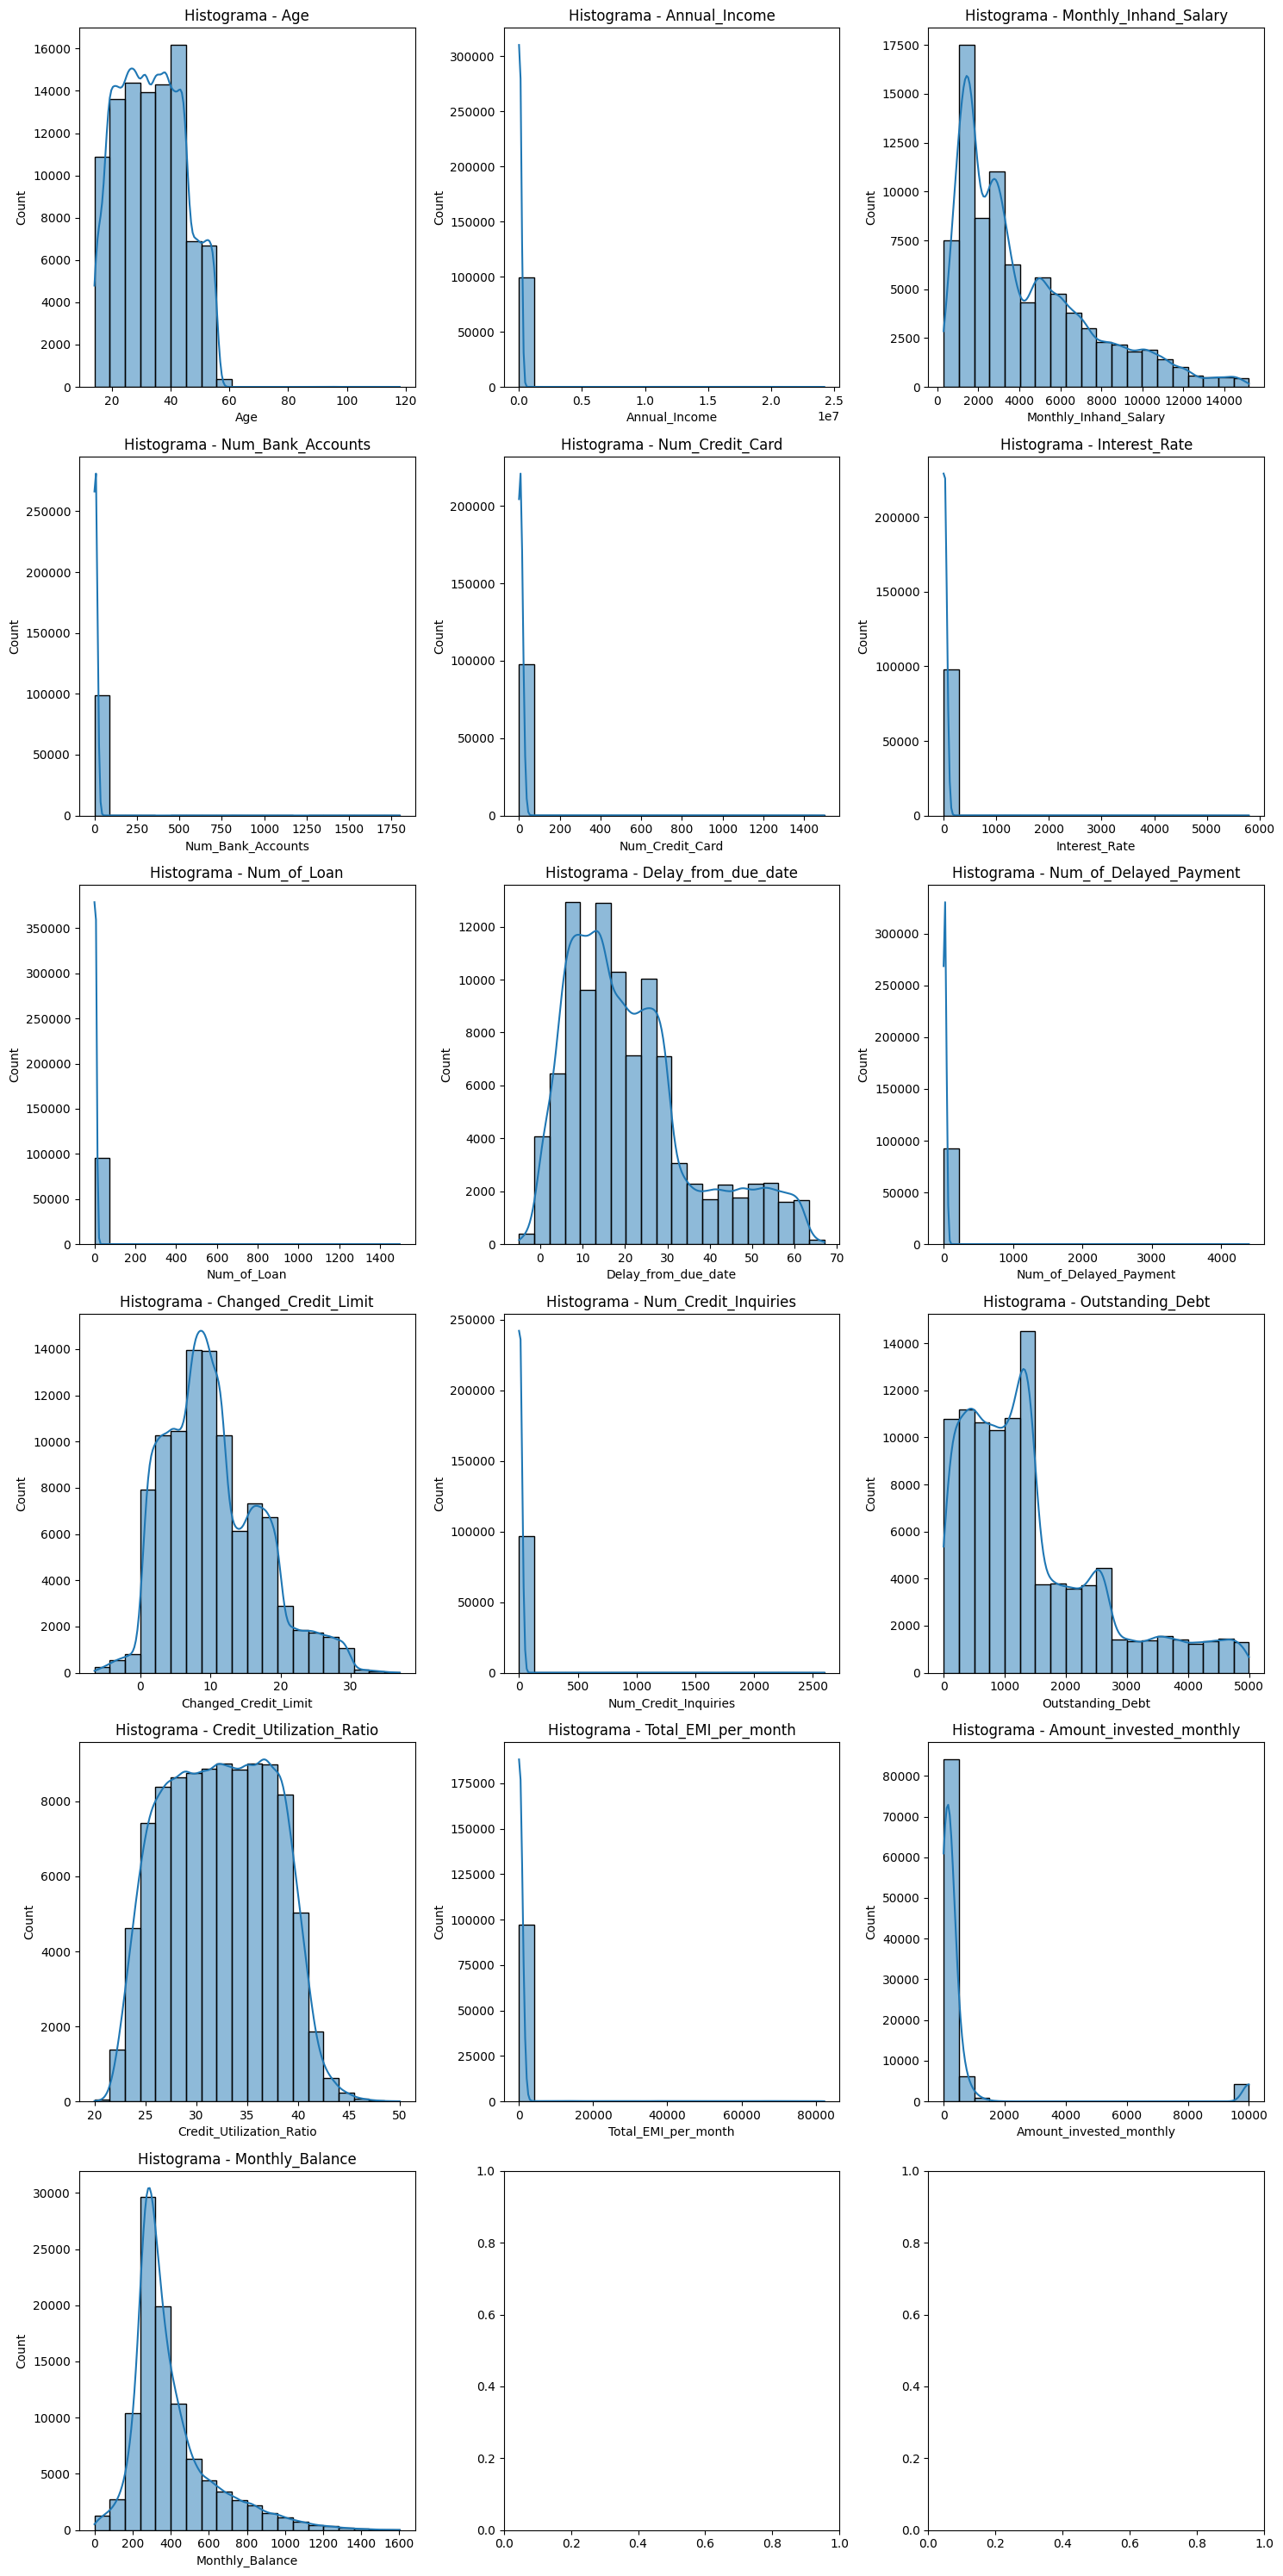

In [106]:
linhas = 6
colunas = 3

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

for i, coluna in enumerate(colunas_num):
    sns.histplot(data=df_credito, x=df_credito[coluna], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histograma - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

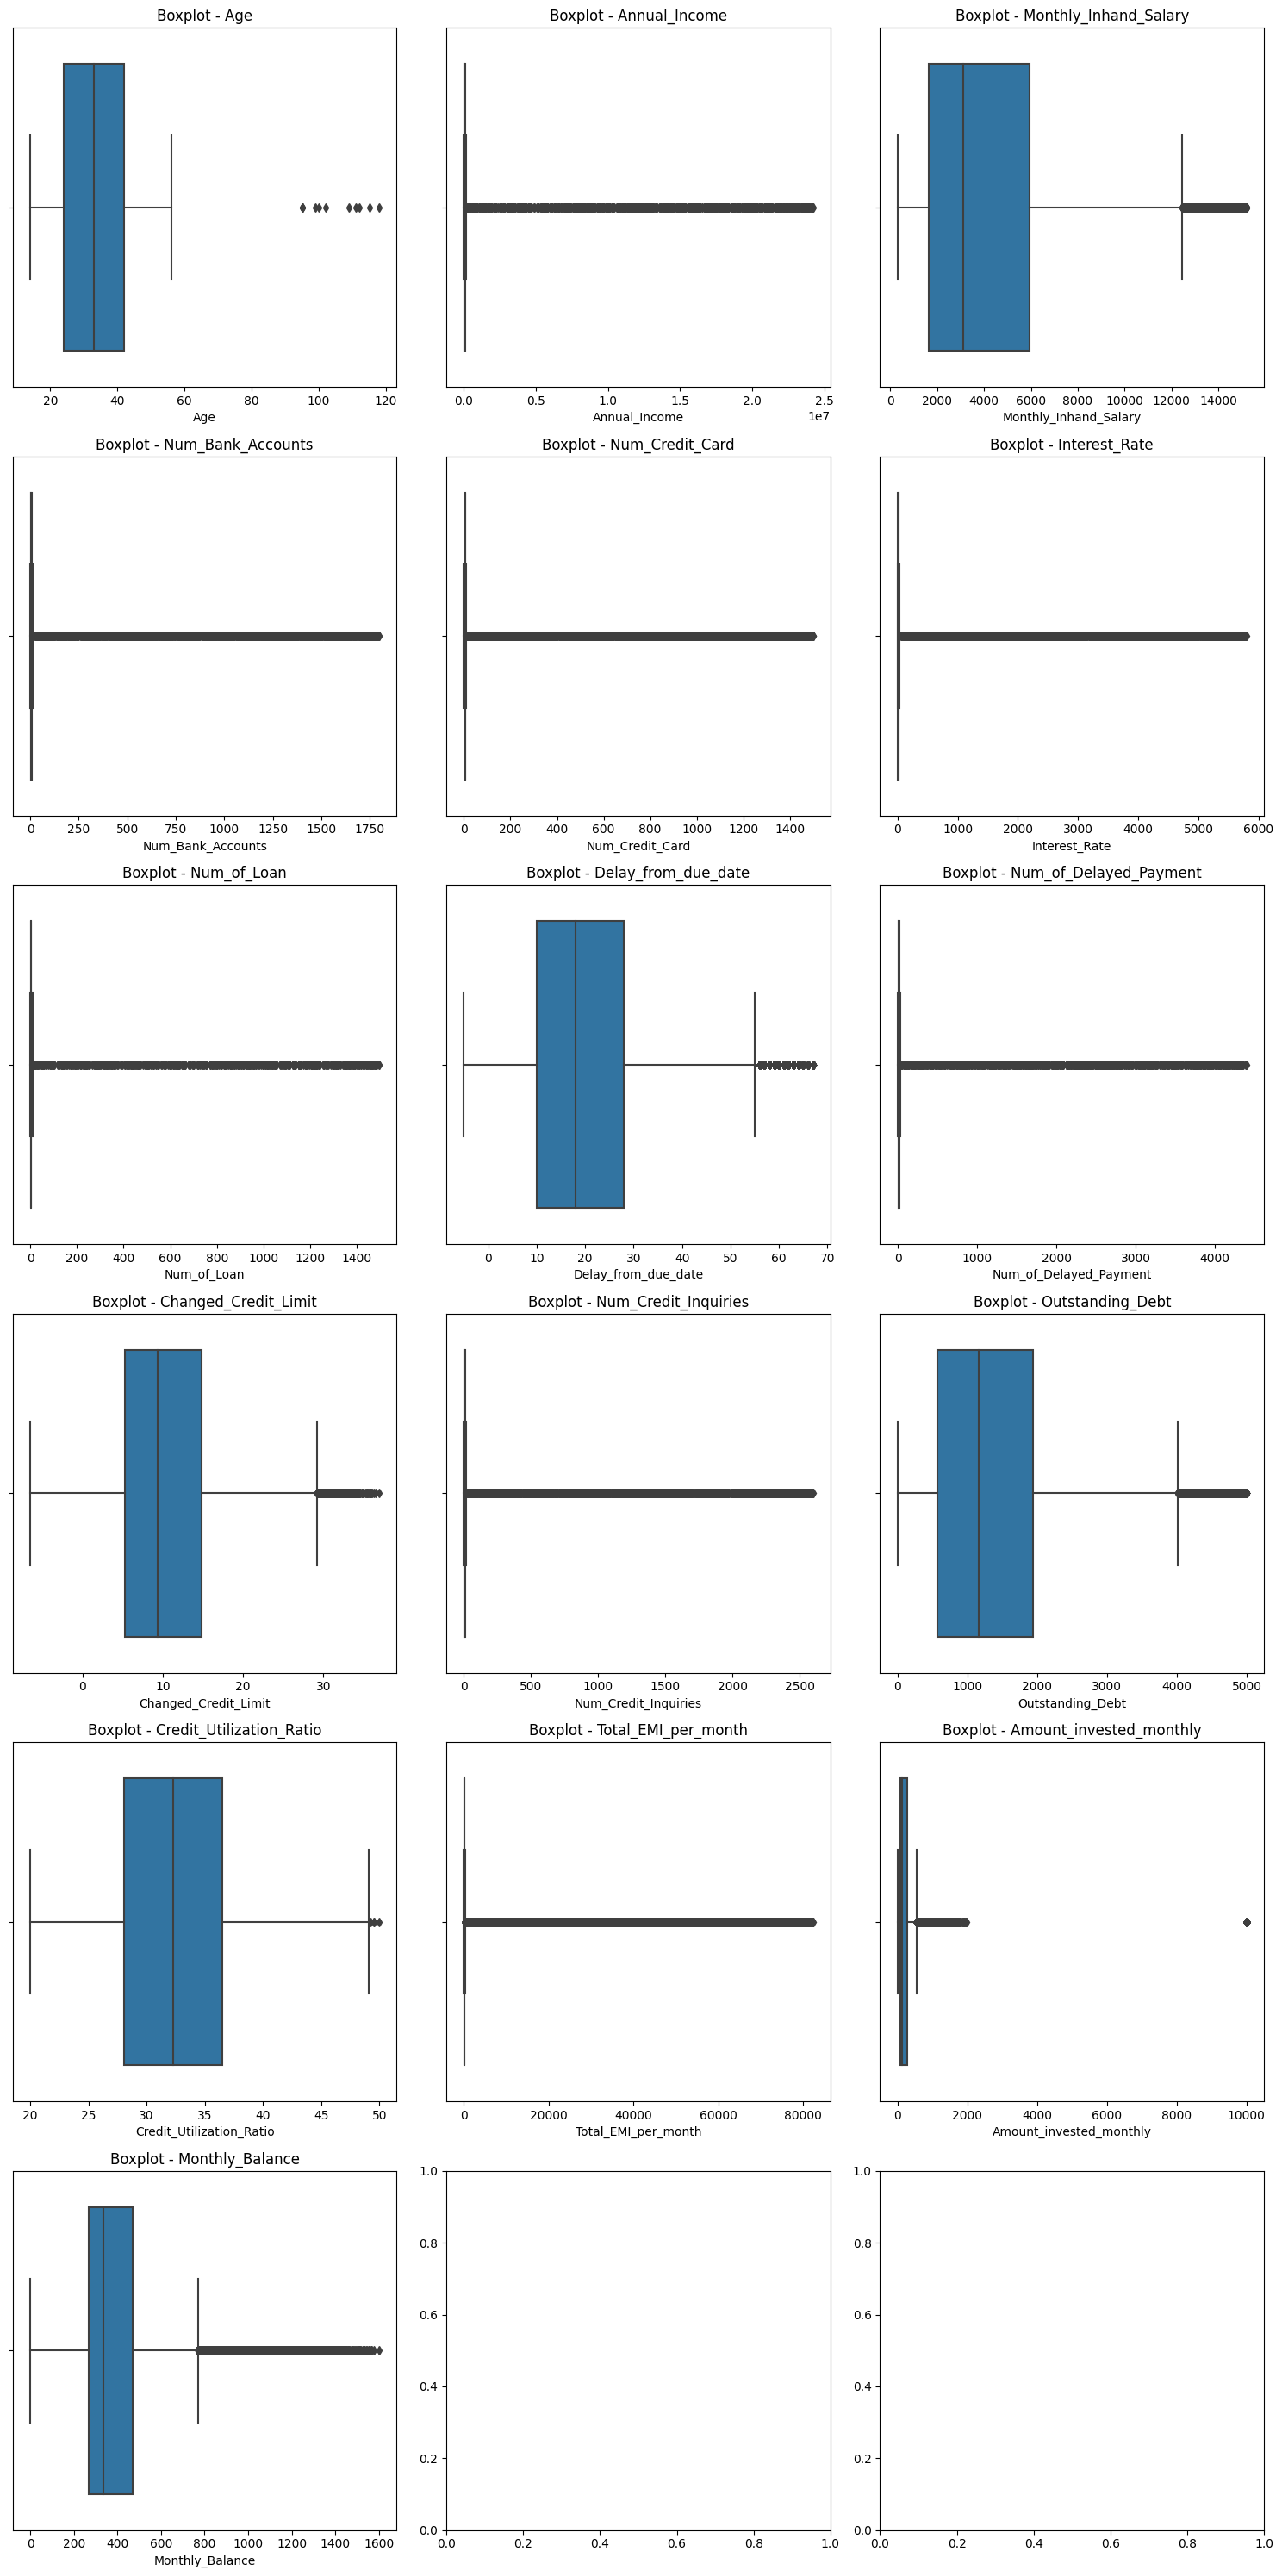

In [107]:
linhas = 6
colunas = 3

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

# Iterar sobre as colunas numéricas e criar Boxplot
for i, coluna in enumerate(colunas_num):
    sns.boxplot(data=df_credito, x=df_credito[coluna], ax=axes[i])
    axes[i].set_title(f'Boxplot - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

##### Tratamentos

In [147]:
df_credito['Age'] = delimitar_valores(df_credito['Age'],0,120)
df_credito['Num_Bank_Accounts'] = limpar_valores_negativos(df_credito['Num_Bank_Accounts'])
df_credito['Num_of_Loan'] = limpar_valores_negativos(df_credito['Num_of_Loan'])
df_credito['Monthly_Balance'] = limpar_valores_negativos(df_credito['Monthly_Balance'])

In [148]:
df_credito.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,97230.00,33.33,10.80,14.00,24.00,33.00,42.00,118.00
Annual_Income,100000.00,176415.70,1429618.05,7005.93,19457.50,37578.61,72790.92,24198062.00
Monthly_Inhand_Salary,84998.00,4194.17,3183.69,303.65,1625.57,3093.75,5957.45,15204.63
Num_Bank_Accounts,99979.00,17.10,117.42,0.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.00,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.00,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Num_of_Loan,96124.00,7.16,60.31,0.00,2.00,3.00,5.00,1496.00
Delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,92998.00,30.92,226.03,-3.00,9.00,14.00,18.00,4397.00
Changed_Credit_Limit,97909.00,10.39,6.79,-6.49,5.32,9.40,14.87,36.97


##### Dados Categóricos

##### Separa 'Type_of_Loan'

In [149]:
# Retirar os "and" e tirar o espaço após a virgula
# Aplica o get_dummies com separador ","
# Concatena os dataframes e exclui a coluna original

df_credito['Type_of_Loan'] = df_credito['Type_of_Loan'].str.replace(' and ','')
df_credito['Type_of_Loan'] = df_credito['Type_of_Loan'].str.replace(', ',',')


df_cat = df_credito['Type_of_Loan'].str.get_dummies(sep=',')


df_credito = pd.concat([df_credito, df_cat], axis=1)
df_credito = df_credito.drop('Type_of_Loan', axis=1)



##### Credit_History_Age - Converter em número de anos

In [150]:
def converter_para_anos(valor):
    try:
       
        valor_str = str(valor)
        
        match = re.match(r'(\d+) Years and (\d+) Months', valor_str)
        
        if match:
            anos = int(match.group(1))
            meses = int(match.group(2))
            total_em_anos = anos + meses / 12
            return round(total_em_anos, 2)
        else:
            return None
    except:
        return None


df_credito['Credit_History_Age'] = df_credito['Credit_History_Age'].apply(converter_para_anos).astype(float)

   

In [151]:
df_credito['Credit_History_Age']

0       22.08
1         NaN
2       22.25
3       22.33
4       22.42
         ... 
99995   31.50
99996   31.58
99997   31.67
99998   31.75
99999   31.83
Name: Credit_History_Age, Length: 100000, dtype: float64

In [158]:
df_credito.describe(include='all')

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
count,97230.00,92938,100000.00,84998.00,99979.00,100000.00,100000.00,96124.00,100000.00,92998.00,...,100000,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
unique,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33.33,NaN,176415.70,4194.17,17.10,22.47,72.47,7.16,21.07,30.92,...,NaN,0.31,0.32,0.31,0.31,0.31,0.32,0.32,0.31,0.31
std,10.80,NaN,1429618.05,3183.69,117.42,129.06,466.42,60.31,14.86,226.03,...,NaN,0.46,0.47,0.46,0.46,0.46,0.47,0.47,0.46,0.46
min,14.00,NaN,7005.93,303.65,0.00,0.00,1.00,0.00,-5.00,-3.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24.00,NaN,19457.50,1625.57,3.00,4.00,8.00,2.00,10.00,9.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,33.00,NaN,37578.61,3093.75,6.00,5.00,13.00,3.00,18.00,14.00,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,42.00,NaN,72790.92,5957.45,7.00,7.00,20.00,5.00,28.00,18.00,...,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Aprendizado Supervisioando

### SVM (*Support Vector Machine*)

##### Função para visualização de desempenho dos modelos de classificação

In [159]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):

    print("\nMétricas de avaliação de treino:")
    y_pred_train = estimator.predict(X_train)
    cm_train     = confusion_matrix(y_train, y_pred_train)
    ConfusionMatrixDisplay(cm_train).plot(cmap='viridis')
    plt.show()
    print(classification_report(y_train, y_pred_train))
    RocCurveDisplay.from_estimator(estimator, X_train, y_train)

    print("\nMétricas de avaliação de teste:")
    y_pred_test = estimator.predict(X_test)
    cm_test     = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(cm_test).plot(cmap='viridis')
    plt.show()
    print(classification_report(y_test, y_pred_test))
    RocCurveDisplay.from_estimator(estimator, X_test, y_test)

##### Particionando os dados de treino e teste

In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

X = df_credito.drop(columns="Credit_Score")
y = df_credito["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### Transformação das colunas numéricas

In [161]:
features_num          = X_train.select_dtypes(include=np.number).columns.tolist()
num_imputer           = SimpleImputer(strategy="mean")
X_train[features_num] = num_imputer.fit_transform(X_train[features_num])
scaler                = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num])

##### Transformação das colunas categóricas

In [162]:
features_cat          = X_train.select_dtypes(exclude=np.number).columns.tolist()
cat_imputer           = SimpleImputer(strategy="constant", fill_value="unknown")
X_train[features_cat] = cat_imputer.fit_transform(X_train[features_cat])
encoder               = OneHotEncoder()

##### Combinando features numéricas e categóricas após a transformação usando np.hstack

In [163]:
X_train_cat_encoded  = encoder.fit_transform(X_train[features_cat])
X_train_preprocessed = np.hstack((X_train[features_num], X_train_cat_encoded.toarray()))

##### Pré-processamento dos dados de teste

In [166]:
X_test[features_num] = num_imputer.transform(X_test[features_num])
X_test[features_num] = scaler.transform(X_test[features_num])
X_test[features_cat] = cat_imputer.transform(X_test[features_cat])
X_test_cat_encoded   = encoder.transform(X_test[features_cat])

##### Combinando features numéricas e categóricas após a transformação usando np.hstack

In [167]:
X_test_preprocessed = np.hstack((X_test[features_num], X_test_cat_encoded.toarray()))

##### Treinando o modelo SVM

In [168]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train_preprocessed, y_train)

SVC(kernel='linear', random_state=42)

##### Avaliando o modelo com as métricas de classificação


Métricas de avaliação de treino:


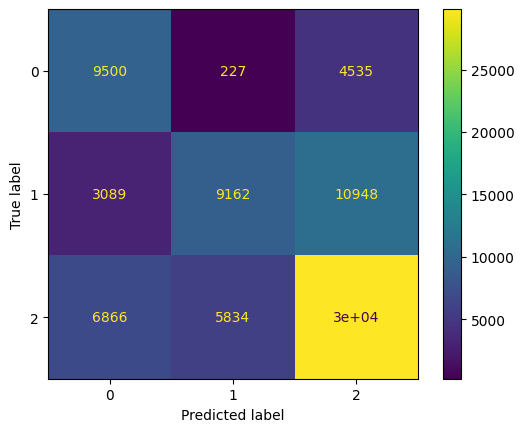

              precision    recall  f1-score   support

        Good       0.49      0.67      0.56     14262
        Poor       0.60      0.39      0.48     23199
    Standard       0.66      0.70      0.68     42539

    accuracy                           0.61     80000
   macro avg       0.58      0.59      0.57     80000
weighted avg       0.61      0.61      0.60     80000



ValueError: Expected 'estimator' to be a binary classifier. Got 3 classes instead.

In [169]:
metricas_classificacao(svm_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

#### Hiperparâmetros:

`C`, `gamma` e `kernel`

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

##### Dicionário de combinações de hiperparâmetros

In [ ]:
parametros = {
              "kernel": ["linear", "rbf", "poly"],
              "C"     : np.logspace(-2, 2, 5),
              "gamma" : np.logspace(-2, 2, 5)
             }

In [ ]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_svc = GridSearchCV(estimator  = SVC(random_state = 42),
                        param_grid = parametros,
                        scoring    = "f1_weighted",
                        cv         = splitter,
                        verbose    = 10)

##### GridSearchCV

In [ ]:
grid_svc.fit(X_train_preprocessed, y_train)

In [ ]:
best_params = grid_svc.best_params_
best_model  = grid_svc.best_estimator_

svm_model.fit(X_train_preprocessed, y_train)

In [ ]:
print("Melhores hiperparâmetros:", best_params)

In [ ]:
metricas_classificacao(best_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)